In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from scipy.sparse import lil_matrix
from sklearn import svm
from sklearn.decomposition import PCA
import sklearn.discriminant_analysis

# First Attempt

In [89]:
data = pd.read_csv("train.csv")
data.shape

(42000, 785)

Seeing the images:

Text(0.5, 1.0, '7')

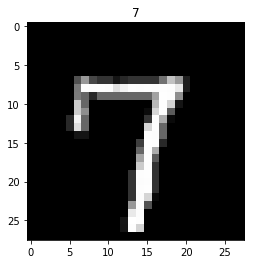

In [91]:
i = 6
image = np.array(data.iloc[i,1:])
image = image.reshape([28, 28])
plt.imshow(image, cmap='gray')
plt.title(data.iloc[i,0])

In [4]:
train_n = 5000
train_labels = np.array(data.iloc[:train_n,0])
train = lil_matrix(np.array(data.iloc[:train_n, 1:]), dtype = 'int32')
train_labels.shape, train.shape

((5000,), (5000, 784))

In [5]:
test_n = 10000
test_labels = np.array(data.iloc[train_n : train_n + test_n, 0])
test = lil_matrix(np.array(data.iloc[train_n : train_n + test_n, 1:]), dtype = 'int32')
test_labels.shape, test.shape

((10000,), (10000, 784))

In [ ]:
clf = svm.SVC(gamma='scale')
clf.fit(train, train_labels)

In [23]:
clf.score(test, test_labels)

0.1534

The first score was 15.3%

# Now let's convert the pixels to binary

In [92]:
data_simple = (np.array(data)[:,1:] >= 120).astype(int)
data_simple.shape

(42000, 784)

Text(0.5, 1.0, '4')

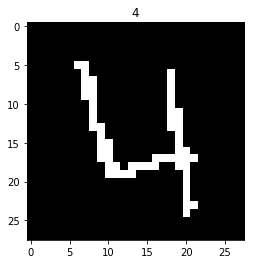

In [93]:
i = 3
image = data_simple[i,:]
image = image.reshape([28, 28])
plt.imshow(image, cmap='gray')
plt.title(data.iloc[i,0])

In [40]:
train_n = 32000
train_labels = np.array(data.iloc[:train_n,0])
train = data_simple[:train_n]
train_labels.shape, train.shape

((32000,), (32000, 784))

In [41]:
test_n = 10000
test_labels = np.array(data.iloc[train_n : train_n + test_n, 0])
test = data_simple[train_n : train_n + test_n]
test_labels.shape, test.shape

((10000,), (10000, 784))

In [ ]:
clf2 = svm.SVC(gamma='scale')
clf2.fit(train, train_labels)

In [ ]:
clf2.score(test, test_labels)

With a pixel treshold of 120 the score jumped to 92.28%!!!

With threshold in 0 the score is 92.26%

With threshold in 200 it decreases to 90%

# Now let's try by applying pca previously

In [42]:
pca = PCA(0.65)
pca.fit(train)
pca.n_components_

33

In [43]:
train_pca = pca.transform(train)
test_pca = pca.transform(test)
train_pca.shape, test_pca.shape

((32000, 33), (10000, 33))

In [48]:
clf3 = svm.SVC(gamma='scale')
clf3.fit(train_pca, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
clf3.score(test_pca, test_labels)

0.9786

With pca at 95% we obtain a score of 93.66%!!!

At 90% confidence it goes up to 94.09%

At 80% confidence it goes up to 94.99%!!!

At 60% confidence we get a score of 95.41%!!!!!

It starts going down after that...

With 65% confidence and with the 32000 entries on the training set the accuracy goes up to **97.86%**

# Time to prepare a submission

In [102]:
train = data_simple
train_labels = np.array(data.iloc[:,0])
test = (pd.read_csv('test.csv') >= 120).astype(int)
train.shape, train_labels.shape, test.shape

((42000, 784), (42000,), (28000, 784))

In [103]:
pca = PCA(0.65)
pca.fit(train)
pca.n_components_

33

In [104]:
train_pca = pca.transform(train)
test_pca = pca.transform(test)
train_pca.shape, test_pca.shape

((42000, 33), (28000, 33))

In [105]:
clf4 = svm.SVC(gamma='scale')
clf4.fit(train_pca, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
pred = clf4.predict(test_pca)
pred.shape

(28000,)

In [111]:
r = np.array([range(1,28001), pred], dtype = int).transpose()
r = pd.DataFrame(r)
r.columns = ["ImageId", "Label"]
r

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [116]:
r.to_csv("submit.csv", index = False)

In [115]:
help(r.to_csv)

Help on method to_csv in module pandas.core.frame:

to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.') method of pandas.core.frame.DataFrame instance
    Write DataFrame to a comma-separated values (csv) file
    
    Parameters
    ----------
    path_or_buf : string or file handle, default None
        File path or object, if None is provided the result is returned as
        a string.
    sep : character, default ','
        Field delimiter for the output file.
    na_rep : string, default ''
        Missing data representation
    float_format : string, default None
        Format string for floating point numbers
    columns : sequence, optional
        Columns to write
    header : boolean or list of string, default Tr